# Step 1. Import Data

In [1]:
import numpy as np
import nltk
import pandas as pd

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


### metadata from movie_titles_metadata

In [2]:
# import movie_titles_metadata
metadata = pd.read_csv('/content/gdrive/My Drive/EMDS/cornell-movie-dialogs-corpus-new-seperator/movie_titles_metadata.txt', sep='|', header=None, names=["movie_id","movie_title","release_year","avg_rating","num_votes","genres"], encoding = "ISO-8859-1")
metadata.head()

,movie_id,movie_title,release_year,avg_rating,num_votes,genres
0,m0,10 things i hate about you,1999,6.9,62847,"['comedy', 'romance']"
1,m1,1492: conquest of paradise,1992,6.2,10421,"['adventure', 'biography', 'drama', 'history']"
2,m2,15 minutes,2001,6.1,25854,"['action', 'crime', 'drama', 'thriller']"
3,m3,2001: a space odyssey,1968,8.4,163227,"['adventure', 'mystery', 'sci-fi']"
4,m4,48 hrs.,1982,6.9,22289,"['action', 'comedy', 'crime', 'drama', 'thrill..."


### characters from movie_characters_metadata

In [3]:
# import movie_characters_metadata
characters = pd.read_csv('/content/gdrive/My Drive/EMDS/cornell-movie-dialogs-corpus-new-seperator/movie_characters_metadata.txt',sep='|', header=None, names=["character_id","character_name","movie_id","movie_title","gender","position_in_credits"],encoding = "ISO-8859-1")
characters.head()

,character_id,character_name,movie_id,movie_title,gender,position_in_credits
0,u0,BIANCA,m0,10 things i hate about you,f,4
1,u1,BRUCE,m0,10 things i hate about you,?,?
2,u2,CAMERON,m0,10 things i hate about you,m,3
3,u3,CHASTITY,m0,10 things i hate about you,?,?
4,u4,JOEY,m0,10 things i hate about you,m,6


### lines from movie_lines

In [4]:
#import movie_lines
lines = pd.read_excel('/content/gdrive/My Drive/EMDS/cornell-movie-dialogs-corpus-new-seperator/liwc_results_movie_line.xlsx')
lines.head()

,line_id,user_id,movie_id,characher_name,line_text,WC,Analytic,Clout,Authentic,Tone,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,L229891,u1036,m68,ALEXANDER,"By Grabthar's Hammer, this is true. 159 NT. L...",13,42.69,50.00,63.54,99.00,...,7.69,0.0,0.0,0.00,0.0,15.38,0.0,7.69,0.0,0.0
1,L1000,u11,m0,WALTER,"Oh, Christ. Don't tell me you've changed you...",15,3.09,97.69,98.01,25.77,...,6.67,0.0,0.0,0.00,0.0,0.00,0.0,20.00,0.0,0.0
2,L10000,u3525,m232,LINDSEY,"Oh... chamber runs. Uh huh, that's good. We...",14,28.22,99.00,13.15,99.00,...,14.29,0.0,0.0,7.14,0.0,0.00,0.0,7.14,0.0,0.0
3,L100000,u4168,m278,JOANNE,No.,1,1.00,1.00,1.00,25.77,...,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0
4,L100001,u4166,m278,DULANEY,Then why did you go see Mr. Koehler in the fi...,12,60.80,95.20,99.00,25.77,...,0.00,0.0,0.0,8.33,0.0,0.00,0.0,0.00,0.0,0.0


In [5]:
lines = lines.loc[:,:'line_text']
lines = lines.rename(columns={"user_id":"character_id"})
lines.head()

,line_id,character_id,movie_id,characher_name,line_text
0,L229891,u1036,m68,ALEXANDER,"By Grabthar's Hammer, this is true. 159 NT. L..."
1,L1000,u11,m0,WALTER,"Oh, Christ. Don't tell me you've changed you..."
2,L10000,u3525,m232,LINDSEY,"Oh... chamber runs. Uh huh, that's good. We..."
3,L100000,u4168,m278,JOANNE,No.
4,L100001,u4166,m278,DULANEY,Then why did you go see Mr. Koehler in the fi...


In [6]:
lines['line_id'] = lines['line_id'].str.strip()
lines['character_id'] = lines['character_id'].str.strip()
lines['movie_id'] = lines['movie_id'].str.strip()
lines.head()

,line_id,character_id,movie_id,characher_name,line_text
0,L229891,u1036,m68,ALEXANDER,"By Grabthar's Hammer, this is true. 159 NT. L..."
1,L1000,u11,m0,WALTER,"Oh, Christ. Don't tell me you've changed you..."
2,L10000,u3525,m232,LINDSEY,"Oh... chamber runs. Uh huh, that's good. We..."
3,L100000,u4168,m278,JOANNE,No.
4,L100001,u4166,m278,DULANEY,Then why did you go see Mr. Koehler in the fi...


### conversations from movie_conversations

In [7]:
# import movie_conversations
conversations = pd.read_csv('/content/gdrive/My Drive/EMDS/cornell-movie-dialogs-corpus-new-seperator/movie_conversations.txt',sep='|', header=None,names=["character_id_first","character_id_second", "movie_id","list_of_text"],encoding = "ISO-8859-1")
conversations.head()

,character_id_first,character_id_second,movie_id,list_of_text
0,u0,u2,m0,"['L194', 'L195', 'L196', 'L197']"
1,u0,u2,m0,"['L198', 'L199']"
2,u0,u2,m0,"['L200', 'L201', 'L202', 'L203']"
3,u0,u2,m0,"['L204', 'L205', 'L206']"
4,u0,u2,m0,"['L207', 'L208']"


# Hypo 2
考虑性别差异，genre差异 
* 女性在dramatic/romantic里台词更多
* 女性在dramatic/romantic里角色更重要

方法：
* 统计男女性台词(#words, #lines)
* 对话中starter vs. respond性别 <br>
lead: 台词长度。mentions in other dialogues.

## 2.1. Gender gap in #lines/words

In [8]:
character_line = pd.merge(characters, lines, on='character_id')
character_line.head()

,character_id,character_name,movie_id_x,movie_title,gender,position_in_credits,line_id,movie_id_y,characher_name,line_text
0,u0,BIANCA,m0,10 things i hate about you,f,4,L1007,m0,BIANCA,Let go!
1,u0,BIANCA,m0,10 things i hate about you,f,4,L1009,m0,BIANCA,I just wanted --
2,u0,BIANCA,m0,10 things i hate about you,f,4,L1011,m0,BIANCA,No! I just wanted
3,u0,BIANCA,m0,10 things i hate about you,f,4,L1021,m0,BIANCA,Is that woman a complete fruit-loop or is it ...
4,u0,BIANCA,m0,10 things i hate about you,f,4,L1045,m0,BIANCA,They do not!


In [9]:
set(character_line.gender)

{'?', 'F', 'M', 'f', 'm'}

In [0]:
character_line = character_line[character_line.gender != '?']

In [11]:
set(character_line.gender)

{'F', 'M', 'f', 'm'}

In [12]:
no_words = character_line.line_text.str.split().str.len()
character_line['no_words'] = pd.Series(no_words, index = character_line.index)
character_line.head()

,character_id,character_name,movie_id_x,movie_title,gender,position_in_credits,line_id,movie_id_y,characher_name,line_text,no_words
0,u0,BIANCA,m0,10 things i hate about you,f,4,L1007,m0,BIANCA,Let go!,2
1,u0,BIANCA,m0,10 things i hate about you,f,4,L1009,m0,BIANCA,I just wanted --,4
2,u0,BIANCA,m0,10 things i hate about you,f,4,L1011,m0,BIANCA,No! I just wanted,4
3,u0,BIANCA,m0,10 things i hate about you,f,4,L1021,m0,BIANCA,Is that woman a complete fruit-loop or is it ...,11
4,u0,BIANCA,m0,10 things i hate about you,f,4,L1045,m0,BIANCA,They do not!,3


In [13]:
if character_line.movie_id_x.equals(character_line.movie_id_y):
  character_line.drop(columns=['movie_id_x'])
  character_line = character_line.rename(columns={"movie_id_y":"movie_id"})
  print(character_line.head())

  character_id character_name movie_id_x                 movie_title gender  \
0           u0         BIANCA         m0  10 things i hate about you      f   
1           u0         BIANCA         m0  10 things i hate about you      f   
2           u0         BIANCA         m0  10 things i hate about you      f   
3           u0         BIANCA         m0  10 things i hate about you      f   
4           u0         BIANCA         m0  10 things i hate about you      f   

  position_in_credits line_id movie_id characher_name  \
0                   4   L1007       m0       BIANCA     
1                   4   L1009       m0       BIANCA     
2                   4   L1011       m0       BIANCA     
3                   4   L1021       m0       BIANCA     
4                   4   L1045       m0       BIANCA     

                                           line_text  no_words  
0                                            Let go!         2  
1                                   I just wanted --

In [14]:
character_line = character_line.drop(columns='movie_id_x')
character_line.head()

,character_id,character_name,movie_title,gender,position_in_credits,line_id,movie_id,characher_name,line_text,no_words
0,u0,BIANCA,10 things i hate about you,f,4,L1007,m0,BIANCA,Let go!,2
1,u0,BIANCA,10 things i hate about you,f,4,L1009,m0,BIANCA,I just wanted --,4
2,u0,BIANCA,10 things i hate about you,f,4,L1011,m0,BIANCA,No! I just wanted,4
3,u0,BIANCA,10 things i hate about you,f,4,L1021,m0,BIANCA,Is that woman a complete fruit-loop or is it ...,11
4,u0,BIANCA,10 things i hate about you,f,4,L1045,m0,BIANCA,They do not!,3


In [15]:
movie_character_line = pd.merge(metadata, character_line, on=["movie_id", "movie_title"])
movie_character_line.head()

,movie_id,movie_title,release_year,avg_rating,num_votes,genres,character_id,character_name,gender,position_in_credits,line_id,characher_name,line_text,no_words
0,m0,10 things i hate about you,1999,6.9,62847,"['comedy', 'romance']",u0,BIANCA,f,4,L1007,BIANCA,Let go!,2
1,m0,10 things i hate about you,1999,6.9,62847,"['comedy', 'romance']",u0,BIANCA,f,4,L1009,BIANCA,I just wanted --,4
2,m0,10 things i hate about you,1999,6.9,62847,"['comedy', 'romance']",u0,BIANCA,f,4,L1011,BIANCA,No! I just wanted,4
3,m0,10 things i hate about you,1999,6.9,62847,"['comedy', 'romance']",u0,BIANCA,f,4,L1021,BIANCA,Is that woman a complete fruit-loop or is it ...,11
4,m0,10 things i hate about you,1999,6.9,62847,"['comedy', 'romance']",u0,BIANCA,f,4,L1045,BIANCA,They do not!,3


In [16]:
import string
genres = set()
table = str.maketrans({key: None for key in string.punctuation})
for i in movie_character_line.genres:
  i = i.translate(table)
  genres.update(i.split())
print(genres)

{'mystery', 'western', 'comedy', 'fantasy', 'horror', 'musical', 'adult', 'short', 'animation', 'adventure', 'sport', 'drama', 'family', 'history', 'filmnoir', 'biography', 'documentary', 'crime', 'thriller', 'music', 'scifi', 'war', 'romance', 'action'}


In [0]:
import re
gender_comp_lines = {}
gender_comp_words = {}
#test = movie_character_line[:100]
# In groupby, sort=True by default, so 0 is female, 1 is male.
for i in genres:
  tmp = movie_character_line.genres.str.contains(i, re.IGNORECASE).groupby(movie_character_line.gender.str.lower()).sum()
  if tmp[0] or tmp[1]:
    gender_comp_lines[i] = tmp
    tmp2 = movie_character_line[movie_character_line.genres.str.contains(i, re.IGNORECASE)].groupby(movie_character_line.gender.str.lower()).sum().no_words
    gender_comp_words[i] = tmp2

In [18]:
gender_comp_lines

{'action': gender
 f    11406.0
 m    37521.0
 Name: genres, dtype: float64, 'adult': gender
 f    155.0
 m      0.0
 Name: genres, dtype: float64, 'adventure': gender
 f     6643.0
 m    25589.0
 Name: genres, dtype: float64, 'animation': gender
 f     819.0
 m    3598.0
 Name: genres, dtype: float64, 'biography': gender
 f    2211.0
 m    8858.0
 Name: genres, dtype: float64, 'comedy': gender
 f    23816.0
 m    53695.0
 Name: genres, dtype: float64, 'crime': gender
 f    15064.0
 m    44941.0
 Name: genres, dtype: float64, 'documentary': gender
 f    391.0
 m    608.0
 Name: genres, dtype: float64, 'drama': gender
 f     41037.0
 m    100031.0
 Name: genres, dtype: float64, 'family': gender
 f    1607.0
 m    3181.0
 Name: genres, dtype: float64, 'fantasy': gender
 f     6697.0
 m    16536.0
 Name: genres, dtype: float64, 'history': gender
 f     767.0
 m    4699.0
 Name: genres, dtype: float64, 'horror': gender
 f    10838.0
 m    16197.0
 Name: genres, dtype: float64, 'music': gen

In [19]:
gender_comp_words

{'action': gender
 f    108417
 m    378815
 Name: no_words, dtype: int64, 'adult': gender
 f    1499
 Name: no_words, dtype: int64, 'adventure': gender
 f     62694
 m    255575
 Name: no_words, dtype: int64, 'animation': gender
 f     7691
 m    36851
 Name: no_words, dtype: int64, 'biography': gender
 f     24838
 m    107818
 Name: no_words, dtype: int64, 'comedy': gender
 f    236040
 m    554958
 Name: no_words, dtype: int64, 'crime': gender
 f    150776
 m    486957
 Name: no_words, dtype: int64, 'documentary': gender
 f    3013
 m    5705
 Name: no_words, dtype: int64, 'drama': gender
 f     421341
 m    1101200
 Name: no_words, dtype: int64, 'family': gender
 f    14858
 m    35409
 Name: no_words, dtype: int64, 'fantasy': gender
 f     64193
 m    173984
 Name: no_words, dtype: int64, 'history': gender
 f     9876
 m    57213
 Name: no_words, dtype: int64, 'horror': gender
 f     97795
 m    162366
 Name: no_words, dtype: int64, 'music': gender
 f    19277
 m    69549
 Name: 

### Plots

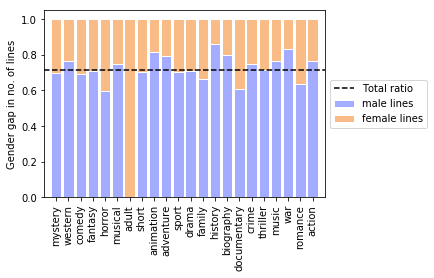

In [280]:
# plot #line gap
import matplotlib.pyplot as plt
female_lines = []
male_lines = []
total_flines, total_mlines = 0, 0
for i in gender_comp_lines.keys():
  tmp = gender_comp_lines[i]
  total_flines += tmp[0]
  if len(tmp)>1:
    total_mlines += tmp[1]
    tmp2 = tmp[0]/(tmp[0]+tmp[1])
  else:
    tmp2 = 1
  tmp2 = tmp[0]/(tmp[0]+tmp[1])
  female_lines.append(tmp2)
  male_lines.append(1-tmp2)

total = total_mlines/(total_mlines+total_flines)

ax = plt.subplots
plt.subplots_adjust(left=0.1, right=0.75, bottom=0.3, top=0.95)
x = range(len(gender_comp_lines))
plt.bar(x, male_lines, label='male lines', color='#a3acff', edgecolor='white', width=0.85)
plt.bar(x, female_lines, label='female lines', bottom=male_lines, color='#f9bc86', edgecolor='white', width=0.85)
plt.xlim(-1,22)
plt.hlines(total, -1,22,colors='k', linestyles='--', label='Total ratio')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(x, gender_comp_lines.keys(),rotation=90)
#plt.title('Gender gap ')
plt.ylabel('Gender gap in no. of lines')
plt.savefig('/content/gdrive/My Drive/EMDS/Hypo1_lines.png')
plt.show()

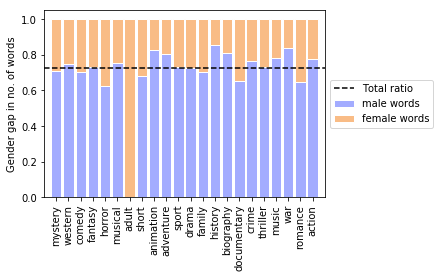

In [281]:
# plot #word gap
female_words = []
male_words = []
total_fwords, total_mwords = 0, 0
for i in gender_comp_words.keys():
  tmp = gender_comp_words[i]
  total_fwords += tmp[0]
  if len(tmp)>1:
    total_mwords += tmp[1]
    tmp2 = tmp[0]/(tmp[0]+tmp[1])
  else:
    tmp2 = 1
  female_words.append(tmp2)
  male_words.append(1-tmp2)

total = total_mwords/(total_fwords+total_mwords)

ax = plt.subplots
plt.subplots_adjust(left=0.1, right=0.75, bottom=0.3, top=0.95)
x = range(len(gender_comp_words))
plt.bar(x, male_words, label='male words', color='#a3acff', edgecolor='white', width=0.85)
plt.bar(x, female_words, label='female words', bottom=male_words, color='#f9bc86', edgecolor='white', width=0.85)
plt.xlim(-1,22)
plt.hlines(total, -1,22,colors='k', linestyles='--', label='Total ratio')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(x, gender_comp_words.keys(),rotation=90)
plt.ylabel('Gender gap in no. of words')
plt.savefig('/content/gdrive/My Drive/EMDS/Hypo1_words.png')
plt.show()

### Discussion
* 用words 和lines no给出的分布一致，只有细小差别。（需要检查#words与#lines correlation吗？）
* scifi 和filmnoir没有结果，给的gender不全
* adult全是女性台词
* 需要对film进行统计么？


1. average->male dominant
2. some above average, history the highest
3. adult->single gender(check outlier)
4. hypothesis: romance(yes), drama(no)
5. higher female->horror, documentary (not expected)

## 2.2. Gender gap in conversation initiator vs. respondent

方法：
* 对话中starter vs. respond性别 <br>
lead: 台词长度。
mentions in other dialogues.

paper discuss leading role

In [22]:
char_shorten = characters.loc[:, ['character_id', 'gender']]
char_shorten.head()

,character_id,gender
0,u0,f
1,u1,?
2,u2,m
3,u3,?
4,u4,m


In [23]:
first_char = pd.merge(conversations, char_shorten, left_on='character_id_first',right_on='character_id')
if first_char.character_id_first.equals(first_char.character_id):
  first_char = first_char.drop(columns=['character_id'])
  first_char = first_char.rename(columns={"gender":"gender_first"})
first_char.head()

,character_id_first,character_id_second,movie_id,list_of_text,gender_first
0,u0,u2,m0,"['L194', 'L195', 'L196', 'L197']",f
1,u0,u2,m0,"['L198', 'L199']",f
2,u0,u2,m0,"['L200', 'L201', 'L202', 'L203']",f
3,u0,u2,m0,"['L204', 'L205', 'L206']",f
4,u0,u2,m0,"['L207', 'L208']",f


In [24]:
first_second = pd.merge(first_char, char_shorten, left_on='character_id_second',right_on='character_id')
if first_second.character_id_second.equals(first_second.character_id):
  first_second = first_second.drop(columns=['character_id'])
  first_second = first_second.rename(columns={"gender":"gender_second"})
first_second.head()

,character_id_first,character_id_second,movie_id,list_of_text,gender_first,gender_second
0,u0,u2,m0,"['L194', 'L195', 'L196', 'L197']",f,m
1,u0,u2,m0,"['L198', 'L199']",f,m
2,u0,u2,m0,"['L200', 'L201', 'L202', 'L203']",f,m
3,u0,u2,m0,"['L204', 'L205', 'L206']",f,m
4,u0,u2,m0,"['L207', 'L208']",f,m


In [25]:
print(len(first_second))
first_second = first_second[(first_second.gender_first != '?') &(first_second.gender_second != '?')]
print(len(first_second))

83097
52038


In [26]:
first_second.head()

,character_id_first,character_id_second,movie_id,list_of_text,gender_first,gender_second
0,u0,u2,m0,"['L194', 'L195', 'L196', 'L197']",f,m
1,u0,u2,m0,"['L198', 'L199']",f,m
2,u0,u2,m0,"['L200', 'L201', 'L202', 'L203']",f,m
3,u0,u2,m0,"['L204', 'L205', 'L206']",f,m
4,u0,u2,m0,"['L207', 'L208']",f,m


In [27]:
fs_movie = pd.merge(first_second, metadata, on='movie_id')
fs_movie.head()

,character_id_first,character_id_second,movie_id,list_of_text,gender_first,gender_second,movie_title,release_year,avg_rating,num_votes,genres
0,u0,u2,m0,"['L194', 'L195', 'L196', 'L197']",f,m,10 things i hate about you,1999,6.9,62847,"['comedy', 'romance']"
1,u0,u2,m0,"['L198', 'L199']",f,m,10 things i hate about you,1999,6.9,62847,"['comedy', 'romance']"
2,u0,u2,m0,"['L200', 'L201', 'L202', 'L203']",f,m,10 things i hate about you,1999,6.9,62847,"['comedy', 'romance']"
3,u0,u2,m0,"['L204', 'L205', 'L206']",f,m,10 things i hate about you,1999,6.9,62847,"['comedy', 'romance']"
4,u0,u2,m0,"['L207', 'L208']",f,m,10 things i hate about you,1999,6.9,62847,"['comedy', 'romance']"


In [270]:
t = 0
for i in range(len(fs_movie)):
  tmp = fs_movie.genres[i]
  if 'war' in tmp: t+= 1
print(t)

1618


In [256]:
len(set(fs_movie.movie_id))

591

In [258]:
len(fs_movie.genres)

52038

In [254]:
fs_movie.genres.str.contains('war', re.IGNORECASE).groupby([fs_movie.gender_first.str.lower(),fs_movie.gender_second.str.lower()]).sum()

gender_first  gender_second
f             f                  14.0
              m                 251.0
m             f                 293.0
              m                1060.0
Name: genres, dtype: float64

In [0]:
ff, fm, mf, mm = [],[],[],[]
for i in genres:
  # add all the Trues, so count the ones contain genre
  tmp = fs_movie.genres.str.contains(i, re.IGNORECASE).groupby([fs_movie.gender_first.str.lower(),fs_movie.gender_second.str.lower()]).sum()
  if tmp[0]:
    ff.append(tmp[0])
  else:
    ff.append(0)
  if tmp[1]:
    fm.append(tmp[1])
  else:
    fm.append(0)
  if tmp[2]:
    mf.append(tmp[2])
  else:
    mf.append(0)
  if tmp[3]:
    mm.append(tmp[3])
  else:
    mm.append(0)

### Plots

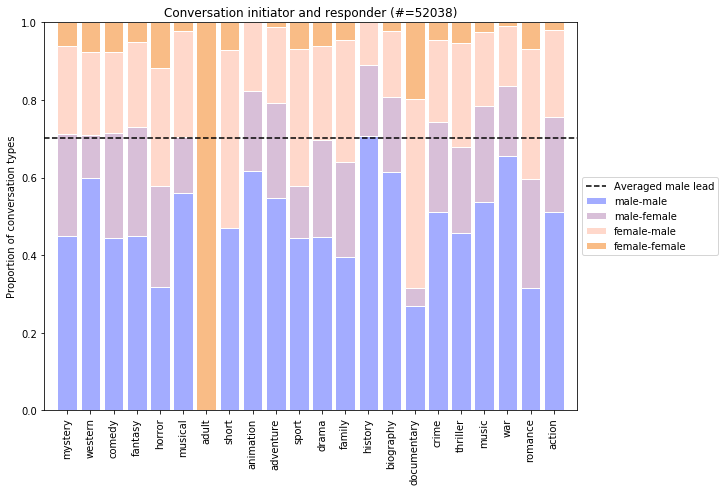

In [282]:
ff_ratio, fm_ratio, mf_ratio, mm_ratio = [],[],[],[]
total_ff, total_fm, total_mf, total_mm = 0, 0, 0, 0
x = []
for i, name in enumerate(genres):
  tmp = ff[i]+fm[i]+mf[i]+mm[i]
  #print(tmp)
  if tmp == 0: continue
  x.append(name)
  ff_ratio.append(ff[i]/tmp)
  fm_ratio.append(fm[i]/tmp)
  mf_ratio.append(mf[i]/tmp)
  mm_ratio.append(mm[i]/tmp)
  total_ff += ff[i]
  total_fm += fm[i]
  total_mf += mf[i]
  total_mm += mm[i]
  
bottom_fm = np.add(mm_ratio, mf_ratio)
bottom_ff = np.add(bottom_fm, fm_ratio)
ax = plt.subplots(figsize=(10,7))
plt.subplots_adjust(left=0.06, right=0.8, bottom=0.18, top=0.95)
plt.bar(range(len(x)), mm_ratio, label='male-male', color = '#a3acff', edgecolor='white', width=0.85)
plt.bar(range(len(x)), mf_ratio, label='male-female', bottom=mm_ratio, color="#D8BFD8", edgecolor='white', width=0.85)
plt.bar(range(len(x)), fm_ratio, label='female-male', bottom=bottom_fm, color="#FFD8CB", edgecolor='white', width=0.85)
plt.bar(range(len(x)), ff_ratio, label='female-female', bottom=bottom_ff, color="#f9bc86", edgecolor='white', width=0.85)
plt.xlim(-1,22)
plt.hlines((total_mm + total_mf)/(total_mm + total_mf+total_fm+total_ff), -1,22,colors='k', 
           linestyles='--', label='Averaged male lead')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(range(len(x)), x,rotation=90)
plt.ylabel('Proportion of conversation types')
plt.title('Conversation initiator and responder (#=52038)')
plt.savefig('/content/gdrive/My Drive/EMDS/Hypo2.png')
plt.show()

1. result similar to previous plots, general male starter
2. some have no female-female conversation: history, adventure, war, animation.
3. not expected: documentary, female initiators.
4. short: female lead, no male-female

举个🌰！

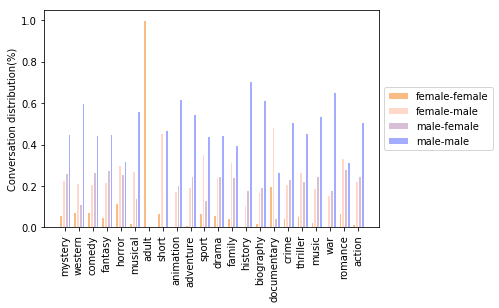

In [30]:
ax = plt.subplot(111)
w = 0.2
ax.bar(np.subtract(range(len(x)),1.5*w), ff_ratio, label='female-female',width=w,color='#f9bc86', edgecolor='white',align='center')
ax.bar(np.subtract(range(len(x)),0.5*w), fm_ratio, label='female-male',width=w,color="#FFD8CB", edgecolor='white',align='center')
ax.bar(np.add(range(len(x)),0.5*w), mf_ratio, label='male-female',width=w,color="#D8BFD8", edgecolor='white',align='center')
ax.bar(np.add(range(len(x)),1.5*w), mm_ratio,label='male-male',width=w,color='#a3acff', edgecolor='white',align='center')
#ax.autoscale(tight=True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(range(len(x)), x,rotation=90)
plt.ylabel('Conversation distribution(%)')
plt.show()

### Discussion
history is really his story....

In [31]:
np.greater(mf, ff)

array([ True,  True,  True,  True,  True,  True, False, False,  True,
        True,  True,  True,  True,  True, False,  True, False,  True,
        True,  True, False,  True,  True,  True])

In [32]:
for i in range(10):
  print(mm[i], mf[i], fm[i], ff[i])

4099.0 2378.0 2076.0 549.0
678.0 126.0 241.0 87.0
7473.0 4524.0 3542.0 1271.0
2571.0 1598.0 1262.0 283.0
2002.0 1636.0 1903.0 743.0
312.0 80.0 153.0 12.0
0 0 0 32.0
79.0 0 77.0 12.0
645.0 215.0 184.0 0
4177.0 1885.0 1496.0 83.0


# Hypo 3
#女/#男 ~ rating; 女性台词长度/男性台词长度 ~ rating

男性主导电影评分更高

In [41]:
movie_character_line.head()

,movie_id,movie_title,release_year,avg_rating,num_votes,genres,character_id,character_name,gender,position_in_credits,line_id,characher_name,line_text,no_words
0,m0,10 things i hate about you,1999,6.9,62847,"['comedy', 'romance']",u0,BIANCA,f,4,L1007,BIANCA,Let go!,2
1,m0,10 things i hate about you,1999,6.9,62847,"['comedy', 'romance']",u0,BIANCA,f,4,L1009,BIANCA,I just wanted --,4
2,m0,10 things i hate about you,1999,6.9,62847,"['comedy', 'romance']",u0,BIANCA,f,4,L1011,BIANCA,No! I just wanted,4
3,m0,10 things i hate about you,1999,6.9,62847,"['comedy', 'romance']",u0,BIANCA,f,4,L1021,BIANCA,Is that woman a complete fruit-loop or is it ...,11
4,m0,10 things i hate about you,1999,6.9,62847,"['comedy', 'romance']",u0,BIANCA,f,4,L1045,BIANCA,They do not!,3


In [190]:
test = movie_character_line.groupby([movie_character_line.movie_id,movie_character_line.gender.str.lower()]).size()
test.head()

movie_id  gender
m0        f         278
          m         359
m1        m         143
m10       f         104
          m         441
dtype: int64

In [138]:
np.shape(test)

(1119,)

In [191]:
test2=test.unstack(level=1)
test2.head()

gender,f,m
movie_id,,
m0,278.0,359.0
m1,NaN,143.0
m10,104.0,441.0
m100,149.0,776.0
m101,42.0,452.0


In [137]:
#test2.index

Index(['m0', 'm1', 'm10', 'm100', 'm101', 'm102', 'm103', 'm104', 'm105',
       'm106',
       ...
       'm90', 'm91', 'm92', 'm93', 'm94', 'm95', 'm96', 'm97', 'm98', 'm99'],
      dtype='object', name='movie_id', length=600)

In [153]:
# test2.f['m0']
# 'm0' in test2.index
# test2.loc['m0'].sum()

637.0

In [197]:
test2 = test2.fillna(0)
ratio = []
for i in test2.index:
#   if test2.f[i]<1:
#     print('no')
#     ratio.append(0.0)
#   elif not test2.m[i]:
#     ratio.append(1.0)
#   else:
  ratio.append(test2.f[i]/test2.loc[i].sum())
#print(ratio)
test2['line_ratio'] = ratio
test2.head()

gender,f,m,line_ratio
movie_id,,,
m0,278.0,359.0,0.436122
m1,0.0,143.0,0.000000
m10,104.0,441.0,0.190759
m100,149.0,776.0,0.161053
m101,42.0,452.0,0.085006


In [198]:
#len(ratio)

600

In [0]:
test2 = test2.join(metadata.set_index('movie_id'), how='left', on='movie_id')

In [200]:
test2.head()

,f,m,line_ratio,movie_title,release_year,avg_rating,num_votes,genres
movie_id,,,,,,,,
m0,278.0,359.0,0.436122,10 things i hate about you,1999,6.9,62847,"['comedy', 'romance']"
m1,0.0,143.0,0.000000,1492: conquest of paradise,1992,6.2,10421,"['adventure', 'biography', 'drama', 'history']"
m10,104.0,441.0,0.190759,affliction,1997,6.9,7252,"['drama', 'mystery', 'thriller']"
m100,149.0,776.0,0.161053,innerspace,1987,6.5,16854,"['action', 'adventure', 'comedy', 'crime', 'sc..."
m101,42.0,452.0,0.085006,the insider,1999,8.0,69660,"['biography', 'drama', 'thriller']"


## 3.1. female presence vs. movie rating

In [201]:
test2 = test2.dropna(how='any')
print(np.shape(test2))
np.corrcoef(test2.line_ratio, test2.avg_rating)

(600, 8)


array([[ 1.        , -0.15924609],
       [-0.15924609,  1.        ]])

In [202]:
np.corrcoef(test2.m, test2.avg_rating)

array([[1.       , 0.2260272],
       [0.2260272, 1.       ]])

In [177]:
np.corrcoef(test2.f, test2.avg_rating)

array([[1.        , 0.05324891],
       [0.05324891, 1.        ]])

### Plots

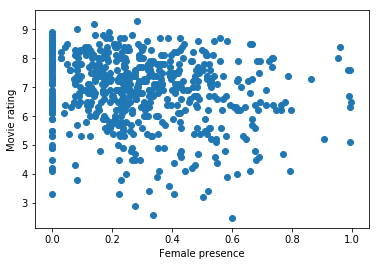

In [239]:
plt.scatter(test2.line_ratio, test2.avg_rating)
plt.xlabel('Female presence')
plt.ylabel('Movie rating')
plt.show()

[[ 1.         -0.16824728]
 [-0.16824728  1.        ]]


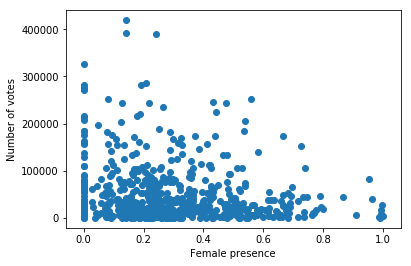

In [240]:
print(np.corrcoef(test2.line_ratio, test2.num_votes))
plt.scatter(test2.line_ratio, test2.num_votes)
plt.xlabel('Female presence')
plt.ylabel('Number of votes')
plt.show()

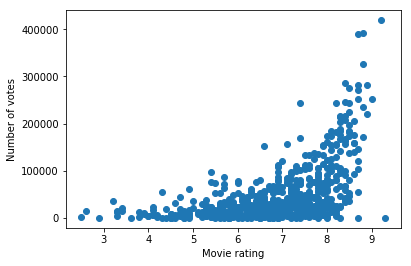

In [241]:
plt.scatter(test2.avg_rating, test2.num_votes)
plt.xlabel('Movie rating')
plt.ylabel('Number of votes')
plt.show()

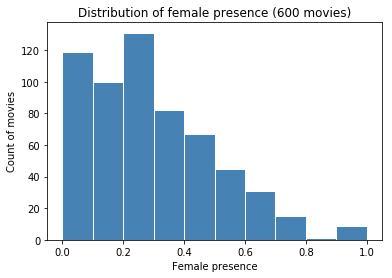

In [283]:
plt.hist(test2.line_ratio,bins=10,facecolor='#4682B4',edgecolor='white')
plt.xlabel('Female presence')
plt.ylabel('Count of movies')
plt.title('Distribution of female presence (600 movies)')
plt.savefig('/content/gdrive/My Drive/EMDS/Hypo3_dist.png')
plt.show()

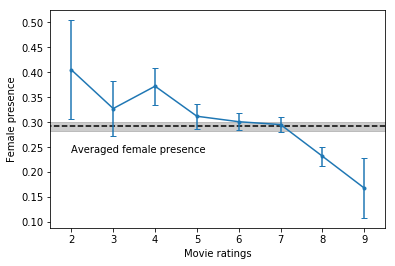

In [284]:
ratio_mean = test2.line_ratio.groupby(test2.avg_rating.apply(int)).mean()
ratio_count = test2.line_ratio.groupby(test2.avg_rating.apply(int)).count()
ratio_std = test2.line_ratio.groupby(test2.avg_rating.apply(int)).std()
#plt.plot(range(2,10),ratio_mean)
total_mean = test2.line_ratio.mean()
total_error = test2.line_ratio.std()/np.sqrt(len(test2))
plt.hlines(total_mean, 1, 10, color='k', linestyle='--')
plt.fill_between(range(1,11), total_mean-total_error, total_mean+total_error, 
                 edgecolor = 'grey', facecolor = 'grey', alpha = 0.4)
plt.errorbar(range(2,10),ratio_mean, yerr=ratio_std/np.sqrt(ratio_count),marker='.',capsize=3)
plt.xlim(1.5,9.5)
plt.text(2, 0.24,'Averaged female presence')
#plt.legend()
plt.ylabel('Female presence')
plt.xlabel('Movie ratings')
plt.savefig('/content/gdrive/My Drive/EMDS/Hypo3.png')
plt.show()

## 3.2. genre or year dependence?

In [184]:
for i in range(2,10):print(i)

2
3
4
5
6
7
8
9
